In [24]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
warnings.simplefilter("ignore")

In [5]:
data = pd.read_csv("Language Detection (1).csv")

In [6]:
X = data["Text"]
y = data["Language"]

In [7]:
le = LabelEncoder()
y = le.fit_transform(y)

In [8]:
data_list = []
for text in X:
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    text = text.lower()
    data_list.append(text)

In [10]:
max_length = max([len(seq) for seq in X])
X = pad_sequences(X, maxlen=max_length, padding='post')

In [12]:
model = Sequential()
model.add(Dense(128, input_shape=(max_length,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(np.unique(y)), activation='softmax'))  # Output layer with number of classes

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
207/207 [==============================] - 3s 9ms/step - loss: 344.3144 - accuracy: 0.0698 - val_loss: 36.5633 - val_accuracy: 0.0756
Epoch 2/10
207/207 [==============================] - 2s 8ms/step - loss: 28.3472 - accuracy: 0.1122 - val_loss: 10.1603 - val_accuracy: 0.1227
Epoch 3/10
207/207 [==============================] - 2s 11ms/step - loss: 11.9320 - accuracy: 0.1306 - val_loss: 5.8251 - val_accuracy: 0.1233
Epoch 4/10
207/207 [==============================] - 2s 8ms/step - loss: 5.4019 - accuracy: 0.1356 - val_loss: 5.1521 - val_accuracy: 0.1324
Epoch 5/10
207/207 [==============================] - 2s 7ms/step - loss: 4.8703 - accuracy: 0.1358 - val_loss: 4.6496 - val_accuracy: 0.1336
Epoch 6/10
207/207 [==============================] - 1s 7ms/step - loss: 4.1108 - accuracy: 0.1368 - val_loss: 4.5580 - val_accuracy: 0.1354
Epoch 7/10
207/207 [==============================] - 1s 7ms/step - loss: 4.2155 - accuracy: 0.1353 - val_loss: 4.1930 - val_accuracy: 0.1360

In [15]:
_, accuracy = model.evaluate(x_test, y_test)
print("Accuracy is :", accuracy)


65/65 [==============================] - 0s 3ms/step - loss: 36.8688 - accuracy: 0.1412
Accuracy is : 0.1411992311477661


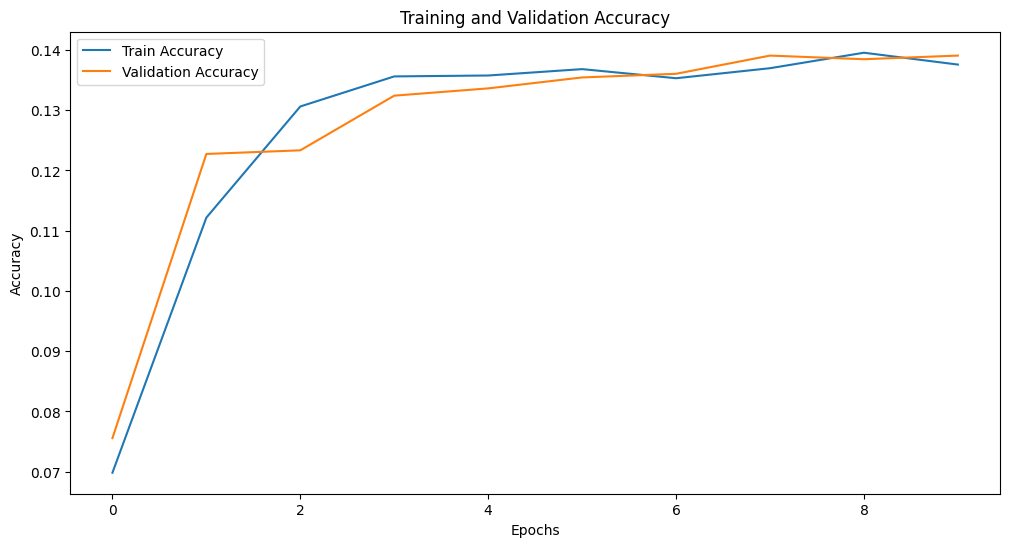

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
text = "This is a sample text in English"
text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
text = re.sub(r'[[]]', ' ', text)
text = text.lower()
seq = tokenizer.texts_to_sequences([text])
padded = pad_sequences(seq, maxlen=max_length, padding='post')
lang = model.predict(padded)




1/1 [==============================] - 0s 23ms/step


In [23]:
import numpy as np
lang = le.inverse_transform(np.argmax(lang,axis=1))
print("The language is:", lang)

The language is: ['English']
